In [34]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import  matplotlib.patches as patches
from PIL import Image

In [41]:
def detect_red_light(I):
    '''
    This function takes a numpy array <I> and returns a list <bounding_boxes>.
    The list <bounding_boxes> should have one element for each red light in the 
    image. Each element of <bounding_boxes> should itself be a list, containing 
    four integers that specify a bounding box: the row and column index of the 
    top left corner and the row and column index of the bottom right corner (in
    that order). See the code below for an example.
    
    Note that PIL loads images in RGB order, so:
    I[:,:,0] is the red channel
    I[:,:,1] is the green channel
    I[:,:,2] is the blue channel
    '''
    
    
    bounding_boxes = [] # This should be a list of lists, each of length 4. See format example below. 
    
    '''
    BEGIN YOUR CODE
    '''
    data_path = 'data/kernel'
    kernel = Image.open(os.path.join(data_path,'kernel.jpg'))
    kernel = np.asarray(kernel)
    box_height = kernel.shape[0]
    box_width = kernel.shape[1]

    r_kernel = kernel[:,:,0]
    r_kernel = r_kernel / np.linalg.norm(r_kernel) # normalize
    r_I = I[:,:,0]

    threshold = 0.9
    for row in range(r_I.shape[0]-box_height):
        for col in range(r_I.shape[1]-box_width):
            r_I_part = r_I[row:row+box_height,col:col+box_width]
            r_I_part = r_I_part / np.linalg.norm(r_I_part) # normalize
            convolution = np.sum(np.multiply(r_kernel,r_I_part))
            if convolution > threshold:
                tl_row = row
                tl_col = col
                br_row = tl_row + box_height
                br_col = tl_col + box_width
                bounding_boxes.append([tl_row,tl_col,br_row,br_col])

    # '''
    # As an example, here's code that generates between 1 and 5 random boxes
    # of fixed size and returns the results in the proper format.
    # '''
    #
    # box_height = 8
    # box_width = 6
    #
    # num_boxes = np.random.randint(1,5)
    #
    # for i in range(num_boxes):
    #     (n_rows,n_cols,n_channels) = np.shape(I)
    #
    #     tl_row = np.random.randint(n_rows - box_height)
    #     tl_col = np.random.randint(n_cols - box_width)
    #     br_row = tl_row + box_height
    #     br_col = tl_col + box_width
    #
    #     bounding_boxes.append([tl_row,tl_col,br_row,br_col])
    
    '''
    END YOUR CODE
    '''
    
    for i in range(len(bounding_boxes)):
        assert len(bounding_boxes[i]) == 4
    
    return bounding_boxes

In [36]:
# load data from JSON file
preds_path = 'data/hw01_preds'
with open(os.path.join(preds_path,'preds.json'), 'r') as read_file:
    data = json.load(read_file)
   
data_path = 'data/RedLights2011_Medium'
# get sorted list of files:
file_names = sorted(os.listdir(data_path))
# remove any non-JPEG files:
file_names = [f for f in file_names if '.jpg' in f]

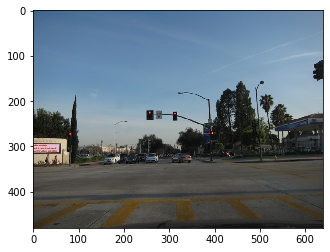

In [42]:
I = Image.open(os.path.join(data_path,file_names[331]))
I = np.asarray(I)
plt.imshow(I)

In [43]:
boxes = detect_red_light(I)
print(boxes)

[[221, 249, 243, 266], [222, 249, 244, 266]]


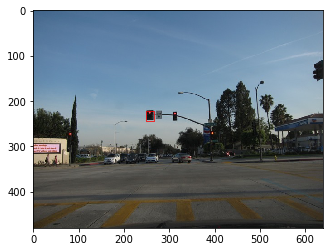

In [44]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(I)

for box in boxes:
    # a bounding box: the row and column index of the top left corner
    #  and the row and column index of the bottom right corner (in that order)
    # Create a Rectangle patch
    #((The inverse top left coordinates),width,height)
    rect = patches.Rectangle((box[1],box[0]),box[3]-box[1],box[2]-box[0],linewidth=0.5,edgecolor='r',facecolor='none')        
    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()
# 
# save_folder = 'data/visulizaton/'
# if not os.path.isdir(save_folder):
#     os.makedirs(save_folder)
# fig.savefig(save_folder + file_names[0][:-4] + '.png')

In [ ]:
# for file_name in file_names:
#     I = Image.open(os.path.join(data_path,file_name))
#     I = np.asarray(I)
# 
#     # Create figure and axes
#     fig,ax = plt.subplots(1)
# 
#     # Display the image
#     ax.imshow(I)
# 
#     for box in data[file_name]:
#         # Create a Rectangle patch
#         #((The bottom left coordinates),width,height)
#         rect = patches.Rectangle((box[1],box[0]),box[3]-box[1],box[2]-box[0],linewidth=0.5,edgecolor='r',facecolor='none')        
#         # Add the patch to the Axes
#         ax.add_patch(rect)
#         
#     save_folder = 'data/visulizaton/'
#     if not os.path.isdir(save_folder):
#         os.makedirs(save_folder)
#     fig.savefig(save_folder + file_name[:-4] + '.png')